In [1]:
import pandas as pd
import json
from pprint import pprint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [2]:
def read_file(file_name):
    '''
    This function will read the file containing tweet ids sperating by lines (in groups)
    '''
    all_ids = pd.read_table(file_name,sep='\n',header=None)
    return all_ids

In [3]:
dev_predictions_file = "../output/dev_prediction.csv"
dev_predictions = pd.read_csv(dev_predictions_file)
dev_predict_label = dev_predictions['Predicted']

In [4]:
dev_true_label_file = '../data/valid.dev.label.txt'
dev_true_label = read_file(dev_true_label_file)[0].apply(lambda x: 1 if x=="rumour" else 0)

In [5]:
y_true = list(dev_true_label)
y_pred = list(dev_predict_label)

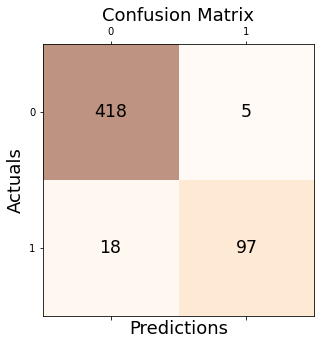

In [6]:
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [8]:
p, r, f, _ = precision_recall_fscore_support(y_true, y_pred, pos_label=1, average="binary")

In [13]:
print("Performance on the rumour class:")
print("Precision =", p)
print("Recall    =", r)
print("F1        =", f)

Performance on the rumour class:
Precision = 0.9509803921568627
Recall    = 0.8434782608695652
F1        = 0.8940092165898618
